In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

# Path to the main crop folder that contains 4 disease class subfolders
dataset_dir = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\imgs_with_good_background'  

image_paths = []
labels = []

# Traverse each subfolder (each representing a class)
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
                image_paths.append(os.path.join(class_path, img_file))
                labels.append(class_name)

# Check total images and unique classes
print(f"Total images found: {len(image_paths)}")
print(f"Classes: {set(labels)}")
print(f"Original class distribution: {dict(Counter(labels))}")

# Split the data with stratification to maintain class balance
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths,
    labels,
    test_size=0.3,
    stratify=labels,
    random_state=42
)

# Save to CSV
train_df = pd.DataFrame({'image_path': train_paths, 'label': train_labels})
test_df = pd.DataFrame({'image_path': test_paths, 'label': test_labels})

train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("\n✅ CSV files created: train_data.csv and test_data.csv")

# Print class distribution in both splits
print("\nTrain class distribution:")
print(train_df['label'].value_counts())

print("\nTest class distribution:")
print(test_df['label'].value_counts())

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to main dataset directory (with 4 subfolders, one per class)
dataset_dir = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\imgs_with_good_background'  

image_paths = []
labels = []

# Collect image paths and labels from each subfolder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')):
                image_paths.append(os.path.join(class_path, img_file))
                labels.append(class_name)

# Perform stratified split
train_paths, test_paths, _, _ = train_test_split(
    image_paths,
    labels,
    test_size=0.3,
    stratify=labels,
    random_state=42
)

# Build DataFrame with only filename and split label
combined_data = []

for path in train_paths:
    filename = os.path.basename(path)
    combined_data.append([filename, "train"])

for path in test_paths:
    filename = os.path.basename(path)
    combined_data.append([filename, "test"])

# Create and save CSV
combined_df = pd.DataFrame(combined_data, columns=['filename', 'split'])
combined_df.to_csv('combined_split.csv', index=False)

print("✅ combined_split.csv created with columns: [filename, split]")

In [ ]:
import os
import cv2
import numpy as np

base_path = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\imgs_with_good_background'
output_path = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\Preprocessed_goodbackgroundProject_dataset'

# HSV threshold values to isolate green leaf regions
lower_green = np.array([25, 40, 40])
upper_green = np.array([85, 255, 255])

# Create output directory
os.makedirs(output_path, exist_ok=True)

# Preprocessing function
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None

    # Resize image
    img = cv2.resize(img, (256, 256))

    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Apply CLAHE on V channel to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    hsv[:, :, 2] = clahe.apply(hsv[:, :, 2])

    # Apply Gaussian Blur to reduce noise
    hsv_blurred = cv2.GaussianBlur(hsv, (5, 5), 0)

    # Create mask for green leaf area
    mask = cv2.inRange(hsv_blurred, lower_green, upper_green)

    # Apply the mask to the original image
    masked = cv2.bitwise_and(img, img, mask=mask)

    return masked

# Loop through each class folder
for label in os.listdir(base_path):
    class_folder = os.path.join(base_path, label)
    if not os.path.isdir(class_folder):
        continue

    # Create output subfolder
    output_class_folder = os.path.join(output_path, label)
    os.makedirs(output_class_folder, exist_ok=True)

    # Process each image in the class folder
    for filename in os.listdir(class_folder):
        img_path = os.path.join(class_folder, filename)
        preprocessed = preprocess_image(img_path)

        if preprocessed is not None:
            save_path = os.path.join(output_class_folder, filename)
            cv2.imwrite(save_path, preprocessed)


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Path to preprocessed images
input_dir = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\Preprocessed_goodbackgroundProject_dataset'
features = []

for label in os.listdir(input_dir):
    class_dir = os.path.join(input_dir, label)
    for file in os.listdir(class_dir):
        path = os.path.join(class_dir, file)
        img = cv2.imread(path)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, _ = cv2.split(hsv)

        mean_h = np.mean(h)
        std_h = np.std(h)
        mean_s = np.mean(s)
        std_s = np.std(s)

        features.append([file, mean_h, std_h, mean_s, std_s, label])

df = pd.DataFrame(features, columns=["filename", "mean_H", "std_H", "mean_S", "std_S", "class"])
df.to_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\color_features2.csv", index=False)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths
input_dir = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\Preprocessed_goodbackgroundProject_dataset'  
output_csv = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\lesion_shape_features2.csv'

# Output structure
features = []

def compute_circularity(area, perimeter):
    if perimeter == 0:
        return 0
    return (4 * np.pi * area) / (perimeter ** 2)

def compute_eccentricity(contour):
    if len(contour) < 5:
        return 0
    ellipse = cv2.fitEllipse(contour)
    major_axis = max(ellipse[1])
    minor_axis = min(ellipse[1])
    if major_axis == 0:
        return 0
    return np.sqrt(1 - (minor_axis / major_axis) ** 2)

# Process each image
for label in os.listdir(input_dir):
    class_path = os.path.join(input_dir, label)
    if not os.path.isdir(class_path):
        continue

    for file in os.listdir(class_path):
        path = os.path.join(class_path, file)
        img = cv2.imread(path)

        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply threshold to isolate lesions (tune if needed)
        _, binary = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY_INV)

        # Find contours (lesions)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        lesion_areas = []
        eccentricities = []
        circularities = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 30:  # skip tiny noise
                continue
            perimeter = cv2.arcLength(cnt, True)

            lesion_areas.append(area)
            eccentricities.append(compute_eccentricity(cnt))
            circularities.append(compute_circularity(area, perimeter))

        # Total leaf area (used for % infected)
        leaf_mask = cv2.inRange(img, (1, 1, 1), (255, 255, 255))
        leaf_area = cv2.countNonZero(leaf_mask)

        total_lesion_area = sum(lesion_areas)
        infected_pct = (total_lesion_area / (leaf_area + total_lesion_area)) * 100 if (leaf_area + total_lesion_area) > 0 else 0

        # Store aggregated stats
        features.append([
            file,
            len(lesion_areas),                           # Lesion count
            np.mean(lesion_areas) if lesion_areas else 0,
            np.mean(eccentricities) if eccentricities else 0,
            np.mean(circularities) if circularities else 0,
            infected_pct,
            label
        ])

# Save to CSV
df = pd.DataFrame(features, columns=[
    "filename", "lesion_count", "mean_lesion_area",
    "mean_eccentricity", "mean_circularity", "infected_area_pct", "class"
])
df.to_csv(output_csv, index=False)
print(f"Saved lesion shape features to: {output_csv}")


In [ ]:
import pandas as pd

# Load CSVs
color_df = pd.read_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\color_features2.csv")
lesion_df = pd.read_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\lesion_shape_features2.csv")

# Merge on filename
merged_df = pd.merge(color_df, lesion_df, on=["filename", "class"])

# Save combined dataset
merged_df.to_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\combined_features2.csv", index=False)
print("Merged features saved to combined_features.csv")


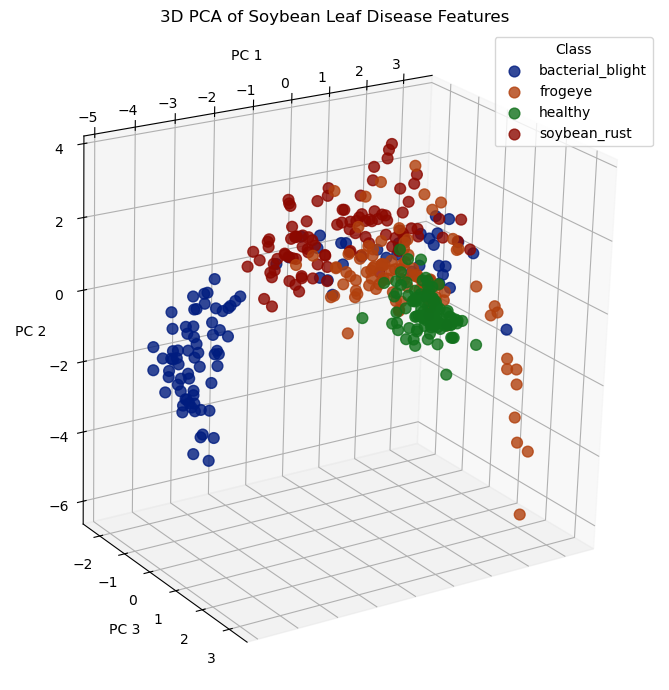

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load the data
df = pd.read_csv(r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\combined_features2.csv')  # Replace with your actual path

# Define feature columns and target label
feature_cols = [
    'mean_H', 'std_H', 'mean_S', 'std_S',
    'lesion_count', 'mean_lesion_area',
    'mean_eccentricity', 'mean_circularity',
    'infected_area_pct'
]
X = df[feature_cols]
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# colors
unique_classes = y.unique()
palette = sns.color_palette("dark", len(unique_classes))
color_map = dict(zip(unique_classes, palette))

# Plot the 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in unique_classes:
    indices = y == label
    ax.scatter(
        X_pca[indices, 0],
        X_pca[indices, 1],
        X_pca[indices, 2],
        label=label,
        color=color_map[label],
        s=60,
        alpha=0.8
    )

# Axis labels and title
ax.set_title("3D PCA of Soybean Leaf Disease Features")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend(title="Class")

# Custom view
ax.view_init(elev=50, azim=145, roll=-120)

plt.tight_layout()
plt.show()


In [6]:
import os
import cv2
import numpy as np

base_path = r'C:\Users\anand.252\OneDrive - The Ohio State University\Desktop\Rohit Project File\rohit_lighting_altered'
output_path = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\Preprocessed_lightingaltered_dataset'

# HSV threshold values to isolate green leaf regions
lower_green = np.array([25, 40, 40])
upper_green = np.array([85, 255, 255])

# Create output directory
os.makedirs(output_path, exist_ok=True)

# Preprocessing function
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None

    # Resize image
    img = cv2.resize(img, (256, 256))

    # Convert to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Apply CLAHE on V channel to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    hsv[:, :, 2] = clahe.apply(hsv[:, :, 2])

    # Apply Gaussian Blur to reduce noise
    hsv_blurred = cv2.GaussianBlur(hsv, (5, 5), 0)

    # Create mask for green leaf area
    mask = cv2.inRange(hsv_blurred, lower_green, upper_green)

    # Apply the mask to the original image
    masked = cv2.bitwise_and(img, img, mask=mask)

    return masked

# Loop through each class folder
for label in os.listdir(base_path):
    class_folder = os.path.join(base_path, label)
    if not os.path.isdir(class_folder):
        continue

    # Create output subfolder
    output_class_folder = os.path.join(output_path, label)
    os.makedirs(output_class_folder, exist_ok=True)

    # Process each image in the class folder
    for filename in os.listdir(class_folder):
        img_path = os.path.join(class_folder, filename)
        preprocessed = preprocess_image(img_path)

        if preprocessed is not None:
            save_path = os.path.join(output_class_folder, filename)
            cv2.imwrite(save_path, preprocessed)

In [7]:
import os
import cv2
import numpy as np
import pandas as pd

# Path to preprocessed images
input_dir = r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\Preprocessed_lightingaltered_dataset"
features = []

for label in os.listdir(input_dir):
    class_dir = os.path.join(input_dir, label)
    for file in os.listdir(class_dir):
        path = os.path.join(class_dir, file)
        img = cv2.imread(path)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, _ = cv2.split(hsv)

        mean_h = np.mean(h)
        std_h = np.std(h)
        mean_s = np.mean(s)
        std_s = np.std(s)

        features.append([file, mean_h, std_h, mean_s, std_s, label])

df = pd.DataFrame(features, columns=["filename", "mean_H", "std_H", "mean_S", "std_S", "class"])
df.to_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\color_features3.csv", index=False)

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# Paths
input_dir = r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\Disease Project\Preprocessed_lightingaltered_dataset" 
output_csv = r'C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\lesion_shape_features3.csv'

# Output structure
features = []

def compute_circularity(area, perimeter):
    if perimeter == 0:
        return 0
    return (4 * np.pi * area) / (perimeter ** 2)

def compute_eccentricity(contour):
    if len(contour) < 5:
        return 0
    ellipse = cv2.fitEllipse(contour)
    major_axis = max(ellipse[1])
    minor_axis = min(ellipse[1])
    if major_axis == 0:
        return 0
    return np.sqrt(1 - (minor_axis / major_axis) ** 2)

# Process each image
for label in os.listdir(input_dir):
    class_path = os.path.join(input_dir, label)
    if not os.path.isdir(class_path):
        continue

    for file in os.listdir(class_path):
        path = os.path.join(class_path, file)
        img = cv2.imread(path)

        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply threshold to isolate lesions (tune if needed)
        _, binary = cv2.threshold(gray, 25, 255, cv2.THRESH_BINARY_INV)

        # Find contours (lesions)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        lesion_areas = []
        eccentricities = []
        circularities = []

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 30:  # skip tiny noise
                continue
            perimeter = cv2.arcLength(cnt, True)

            lesion_areas.append(area)
            eccentricities.append(compute_eccentricity(cnt))
            circularities.append(compute_circularity(area, perimeter))

        # Total leaf area (used for % infected)
        leaf_mask = cv2.inRange(img, (1, 1, 1), (255, 255, 255))
        leaf_area = cv2.countNonZero(leaf_mask)

        total_lesion_area = sum(lesion_areas)
        infected_pct = (total_lesion_area / (leaf_area + total_lesion_area)) * 100 if (leaf_area + total_lesion_area) > 0 else 0

        # Store aggregated stats
        features.append([
            file,
            len(lesion_areas),                           # Lesion count
            np.mean(lesion_areas) if lesion_areas else 0,
            np.mean(eccentricities) if eccentricities else 0,
            np.mean(circularities) if circularities else 0,
            infected_pct,
            label
        ])

# Save to CSV
df = pd.DataFrame(features, columns=[
    "filename", "lesion_count", "mean_lesion_area",
    "mean_eccentricity", "mean_circularity", "infected_area_pct", "class"
])
df.to_csv(output_csv, index=False)
print(f"Saved lesion shape features to: {output_csv}")

Saved lesion shape features to: C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\lesion_shape_features3.csv


In [9]:
import pandas as pd

# Load CSVs
color_df = pd.read_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\color_features3.csv")
lesion_df = pd.read_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\lesion_shape_features3.csv")

# Merge on filename
merged_df = pd.merge(color_df, lesion_df, on=["filename", "class"])

# Save combined dataset
merged_df.to_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\combined_features3.csv", index=False)
print("Merged features saved to combined_features3.csv")

Merged features saved to combined_features3.csv


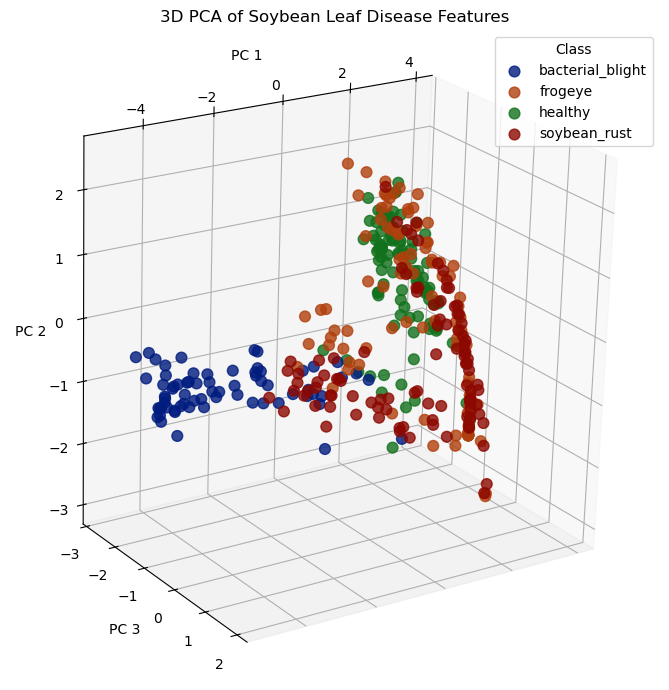

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load the data
df = pd.read_csv(r"C:\Users\anand.252\OneDrive - The Ohio State University\OSU\Summer 2025\Computer Vision\Group Project\combined_features3_lightingaltered.csv")  # Replace with your actual path

# Define feature columns and target label
feature_cols = [
    'mean_H', 'std_H', 'mean_S', 'std_S',
    'lesion_count', 'mean_lesion_area',
    'mean_eccentricity', 'mean_circularity',
    'infected_area_pct'
]
X = df[feature_cols]
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# colors
unique_classes = y.unique()
palette = sns.color_palette("dark", len(unique_classes))
color_map = dict(zip(unique_classes, palette))

# Plot the 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in unique_classes:
    indices = y == label
    ax.scatter(
        X_pca[indices, 0],
        X_pca[indices, 1],
        X_pca[indices, 2],
        label=label,
        color=color_map[label],
        s=60,
        alpha=0.8
    )

# Axis labels and title
ax.set_title("3D PCA of Soybean Leaf Disease Features")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend(title="Class")

# Custom view
ax.view_init(elev=50, azim=145, roll=-120)

plt.tight_layout()
plt.show()
